In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train/255
x_test = x_test/255

<function matplotlib.pyplot.show(close=None, block=None)>

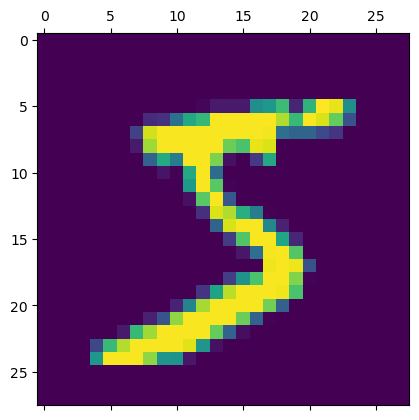

In [7]:
plt.matshow(x_train[0])
plt.show

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,keras.activations.relu),
     keras.layers.Dense(10,keras.activations.softmax),
])


C:\Users\pawar\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='sgd',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'],
)

In [31]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.7373 - loss: 1.0067 - val_accuracy: 0.9039 - val_loss: 0.3550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9033 - loss: 0.3502 - val_accuracy: 0.9190 - val_loss: 0.2898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9187 - loss: 0.2937 - val_accuracy: 0.9264 - val_loss: 0.2595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.9247 - loss: 0.2673 - val_accuracy: 0.9335 - val_loss: 0.2383
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9321 - loss: 0.2371 - val_accuracy: 0.9380 - val_loss: 0.2175
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9362 - loss: 0.2228 - val_accuracy: 0.9419 - val_loss: 0.2028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9435 - loss: 0.2014 - val_accuracy: 0.9435 - val_loss: 0.1899
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9468 -

In [33]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9435 - loss: 0.1861
0.16278314590454102
0.9513999819755554


In [35]:
import random

<function matplotlib.pyplot.show(close=None, block=None)>

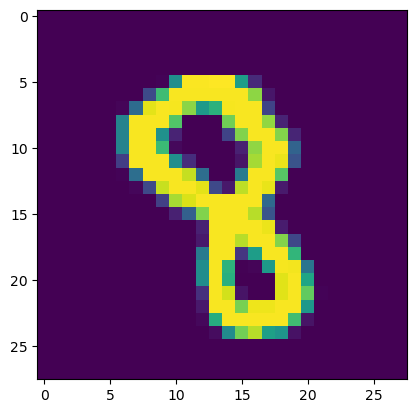

In [37]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [49]:
test_predict = model.predict(x_test)
test_label = np.argmax(test_predict, axis=1)
con_mat = tf.math.confusion_matrix(
    labels = y_test,
    predictions = test_label,
)
print(con_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
tf.Tensor(
[[ 963    0    1    1    0    5    6    3    1    0]
 [   0 1117    2    2    0    1    3    2    8    0]
 [   9    1  973    7    8    2    8   11   11    2]
 [   0    2   10  954    0   16    2   12   10    4]
 [   1    0    4    0  931    0   10    4    4   28]
 [  10    1    1   19    2  836    9    1    8    5]
 [   7    3    4    2    6    9  923    2    2    0]
 [   2    7   20    5    4    1    0  971    2   16]
 [   5    5    5   15    7   10   12    9  901    5]
 [   9    6    1    9   19    6    1    9    4  945]], shape=(10, 10), dtype=int32)
